In [7]:
import pickle as pkl 
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.quantum_info import state_fidelity

from analysis_utils import correct_counts, counts_to_statevector

In [8]:
with open('d1q2_shot_counts.pkl', 'rb') as f:
    counts_all = pkl.load(f)

with open('d1q2_statevectors.pkl', 'rb') as f:
    sv_all = pkl.load(f)

In [9]:
M = 64 # sorry for the hard coding
nrm = 0.8185352771872451 # sorry for the hard coding
def graph(counts_sv, sv, M):

    plt.xlabel("Lattice Site")
    plt.ylabel("Concentration")
    plt.title(f"Concentration at Lattice Sites at t = {i}")

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(counts_sv)[:M:], label='Finite Sampling')

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(sv)[:M:], label="State vector")

    plt.legend()
    plt.show()

In [10]:
fidelity_arr = {}

for i in list(counts_all.keys()):
    counts = counts_all[i]

    if len(list(counts.values())) != pow(2, 8):
        counts = correct_counts(counts, 8)   

    counts_sv = counts_to_statevector(counts)
    expected_sv = sv_all[i]

    fid = state_fidelity(counts_sv, expected_sv)

    fidelity_arr[i] = fid

In [11]:
fidelity_arr

{0: 0.5943379319967189,
 1: 0.6020466331701768,
 2: 0.6031398960773979,
 3: 0.6037866075455097,
 4: 0.6040281008647403,
 5: 0.6046911846395535,
 6: 0.6045103046093249,
 7: 0.604798165179554,
 8: 0.6047553037179398,
 9: 0.6046629894838695,
 10: 0.6044706925145619,
 11: 0.6049383346048555,
 12: 0.6053093058738428,
 13: 0.6051248541959334,
 14: 0.6050973743656323,
 15: 0.6056310556619319,
 16: 0.6048657847421988,
 17: 0.6049939395550693,
 18: 0.6049430830977224,
 19: 0.6046179366469693,
 20: 0.6050669730018657,
 21: 0.6049265739320495,
 22: 0.604683789930979,
 23: 0.6047496590388056,
 24: 0.6053934702335593,
 25: 0.6054140930998041,
 26: 0.6050199374909385,
 27: 0.6053960201159001,
 28: 0.6052781868180924,
 29: 0.6050737425617376,
 30: 0.6049850036430402,
 31: 0.6053879607343252,
 32: 0.6052046979513919,
 33: 0.6052332763925454,
 34: 0.6050126186859841,
 35: 0.6056897371065468,
 36: 0.6051287630355396,
 37: 0.6050968650082398,
 38: 0.6047176430856376,
 39: 0.6051734532498894,
 40: 0.60490

In [14]:
len(fidelity_arr)

50

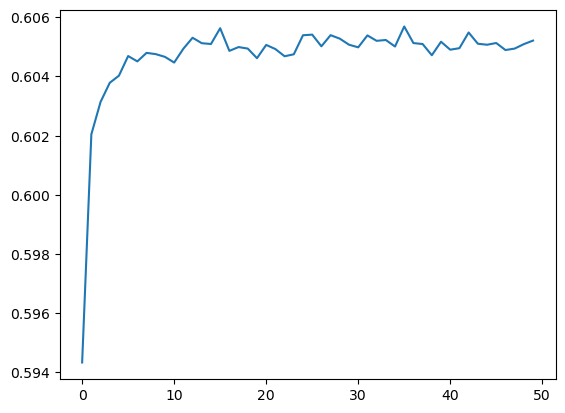

In [15]:
plt.plot(list(range(50)), list(fidelity_arr.values()))
plt.xlabel("Iteration")
plt.ylabel("Fidelity")
plt.title(f"Fidelity of Finite Sampling using Prepared States By Iteration")